In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

In [2]:
url = "https://storage.googleapis.com/qwasar-public/track-ds/Visa_For_Lisa_Loan_Modelling.csv"
df = pd.read_csv(url)


In [3]:
def clean_dataset(dataset):
    try:
        dataset.drop('ID', axis=1, inplace=True)
    except:
        pass

def summarize_data(dataset):
    print(f"Dataset shape: {dataset.shape}")
    print("\nSample 10 rows from dataset:")
    display(dataset.sample(10, random_state=31))

    print("\nDescribe the dataset:")
    display(dataset.describe())

    print("\nNaN values count:")
    display(pd.DataFrame({"Column": dataset.isna().sum().index, "Count": dataset.isna().sum().values}))

def plot_income_distribution(dataset, hue=None):
    sns.displot(data=dataset, x='Income', hue=hue, kde=True, multiple='stack', height=6, aspect=2)
    plt.title("Income Distribution")
    plt.show()

    print()

    sns.displot(data=dataset, x='CCAvg', hue=hue, kde=True, multiple='stack', height=6, aspect=2)
    plt.title("CCAvg Distribution")
    plt.show()

def plot_credit_card_usage(dataset, hue=None):
    sns.displot(data=dataset, x='Education', hue=hue, kde=True, multiple='stack', height=6, aspect=2)

    plt.xticks(np.arange(3) + 1, ['undergraduate', 'graduate', 'advancedl'], rotation=90)
    plt.title("Bank users use credit cards")

    plt.show()

def show_correlation_heatmap(dataset):
    plt.figure(figsize=(12, 12))
    sns.heatmap(data=dataset.corr(), square=True, annot=True, cmap="coolwarm", linewidths=0.1)
    plt.title("Dataset correlation")
    plt.show()

def plot_customer_insights(dataset):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 9))

    palette_color = sns.color_palette('bright')

    ax1.set_title("Personal Loan Approval")
    ax1.pie(dataset['Personal Loan'].value_counts(), labels=['Not Approved', 'Approved'], colors=['red', 'green'], autopct='%.0f%%', shadow=True)

    ax2.set_title("Customers Education Level")
    ax2.pie(dataset['Education'].value_counts(), labels=['Undergraduate', 'Graduate', 'Advanced/Professional'], colors=palette_color, autopct='%.0f%%', shadow=True)

    ax3.set_title("Credit Card Usage")
    ax3.pie(dataset['CreditCard'].value_counts(), labels=['No Usage', 'Usage'], colors=palette_color, autopct='%.0f%%', shadow=True)

    plt.show()

def plot_income_scatter(dataset, hue=None):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

    ax1.set_title("Experience vs Income")
    sns.scatterplot(data=dataset, x='Experience', y='Income', hue=hue, ax=ax1)

    ax2.set_title("Age vs Income")
    sns.scatterplot(data=dataset, x='Age', y='Income', hue=hue, ax=ax2)

    ax3.set_title("Income vs Mortgage")
    sns.scatterplot(data=dataset, y='Income', x='Mortgage', hue=hue, ax=ax3)

    plt.show()

def plot_pair_relationships(dataset, hue=None, columns=None):
    sns.pairplot(dataset[columns], hue=hue, kind='kde')
    plt.title("Some are contradictory")
    plt.show()

def transform_personal_loan(dataset):
    hue = dataset['Personal Loan'].astype(str).replace({'1': 'Given', '0': 'Not Given'})
    return hue

def visualize_histograms(dataset, figsize=(20, 16), bins=100):
    dataset.hist(figsize=figsize, bins=bins)
    plt.show()


Dataset shape: (5000, 13)

Sample 10 rows from dataset:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3914,27,3,35,94080,1,1.8,2,0,0,0,0,0,0
557,39,15,118,95039,2,1.9,1,0,0,0,0,0,1
3013,45,21,183,90029,2,1.4,1,0,0,0,0,1,1
3321,41,15,120,94521,1,5.2,1,0,0,0,0,1,0
1339,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
2177,31,7,108,94507,1,4.0,1,0,0,0,0,1,0
4866,41,17,71,94801,2,3.2,1,0,0,0,0,1,1
3710,49,22,23,90032,2,1.0,2,0,0,0,0,1,1
3267,59,35,21,95818,2,1.0,1,120,0,0,0,1,0
669,56,29,41,94109,4,2.5,2,0,0,0,0,0,0



Describe the dataset:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



NaN values count:


,Column,Count
0,Age,0
1,Experience,0
2,Income,0
3,ZIP Code,0
4,Family,0
5,CCAvg,0
6,Education,0
7,Mortgage,0
8,Personal Loan,0
9,Securities Account,0


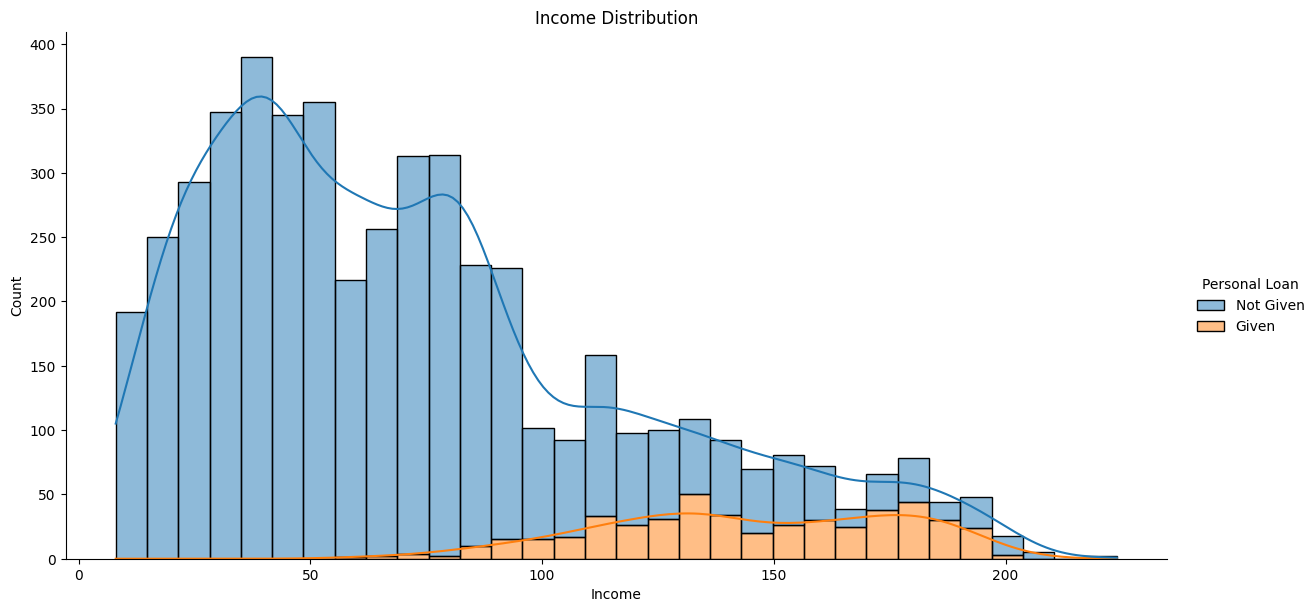

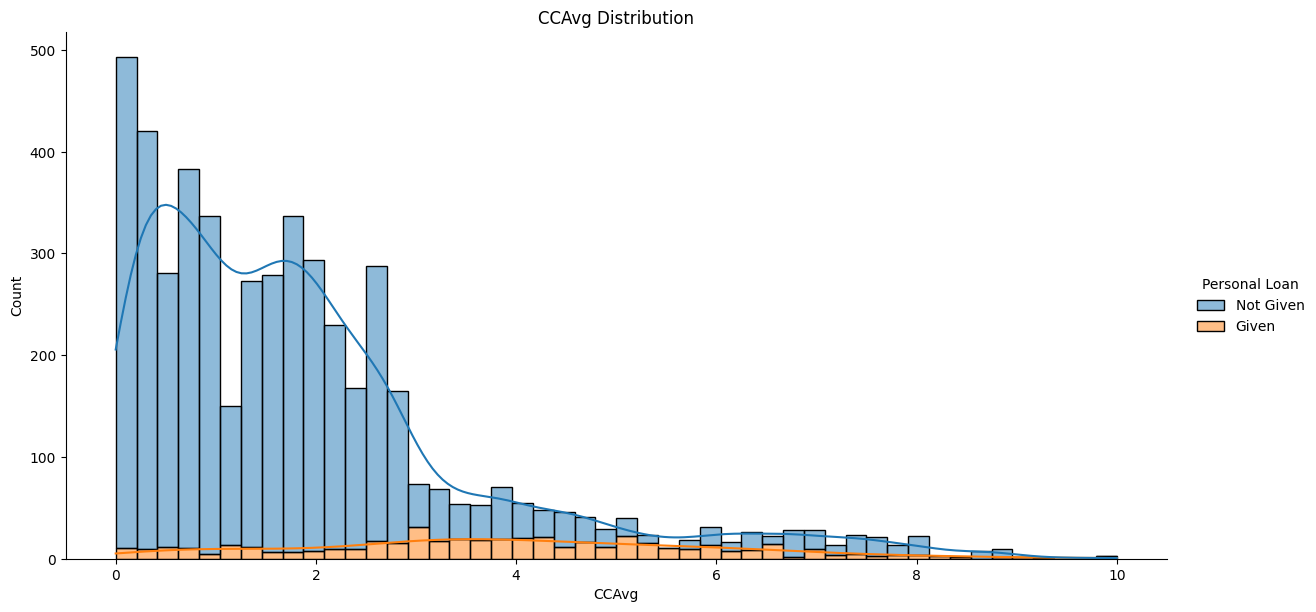

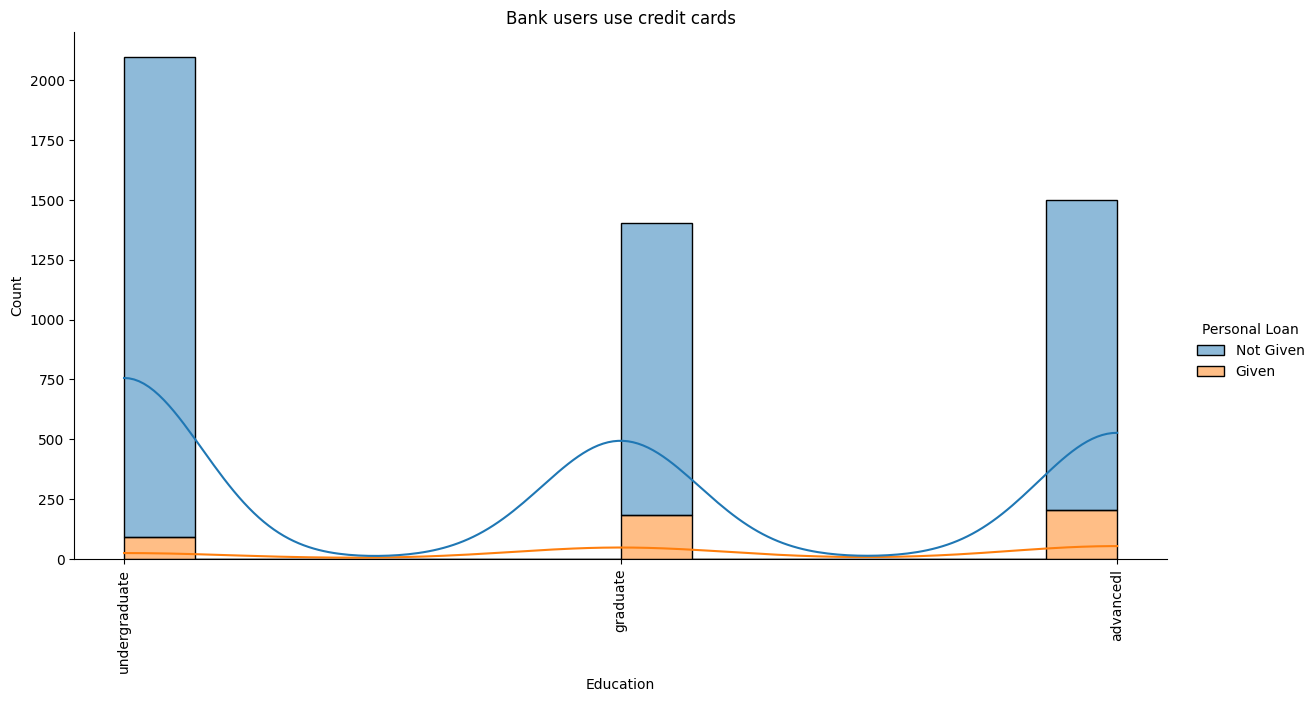

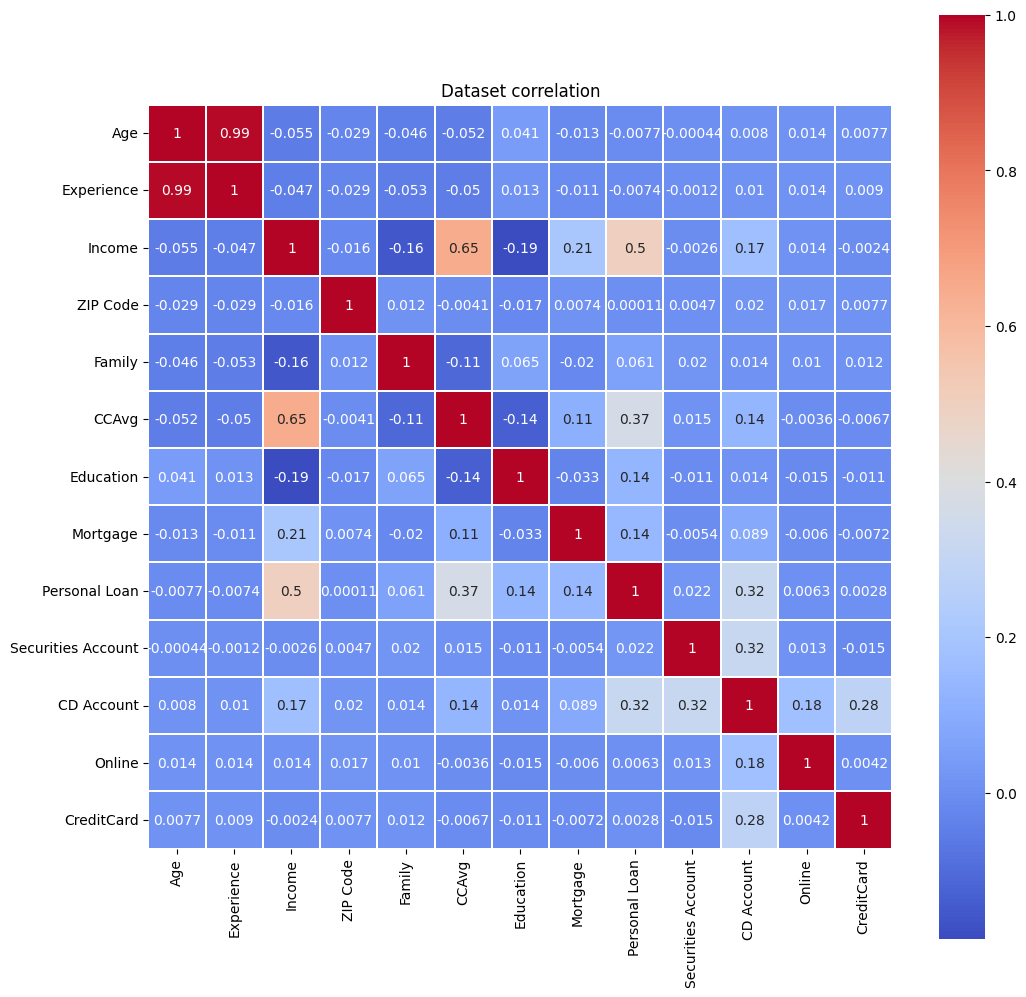

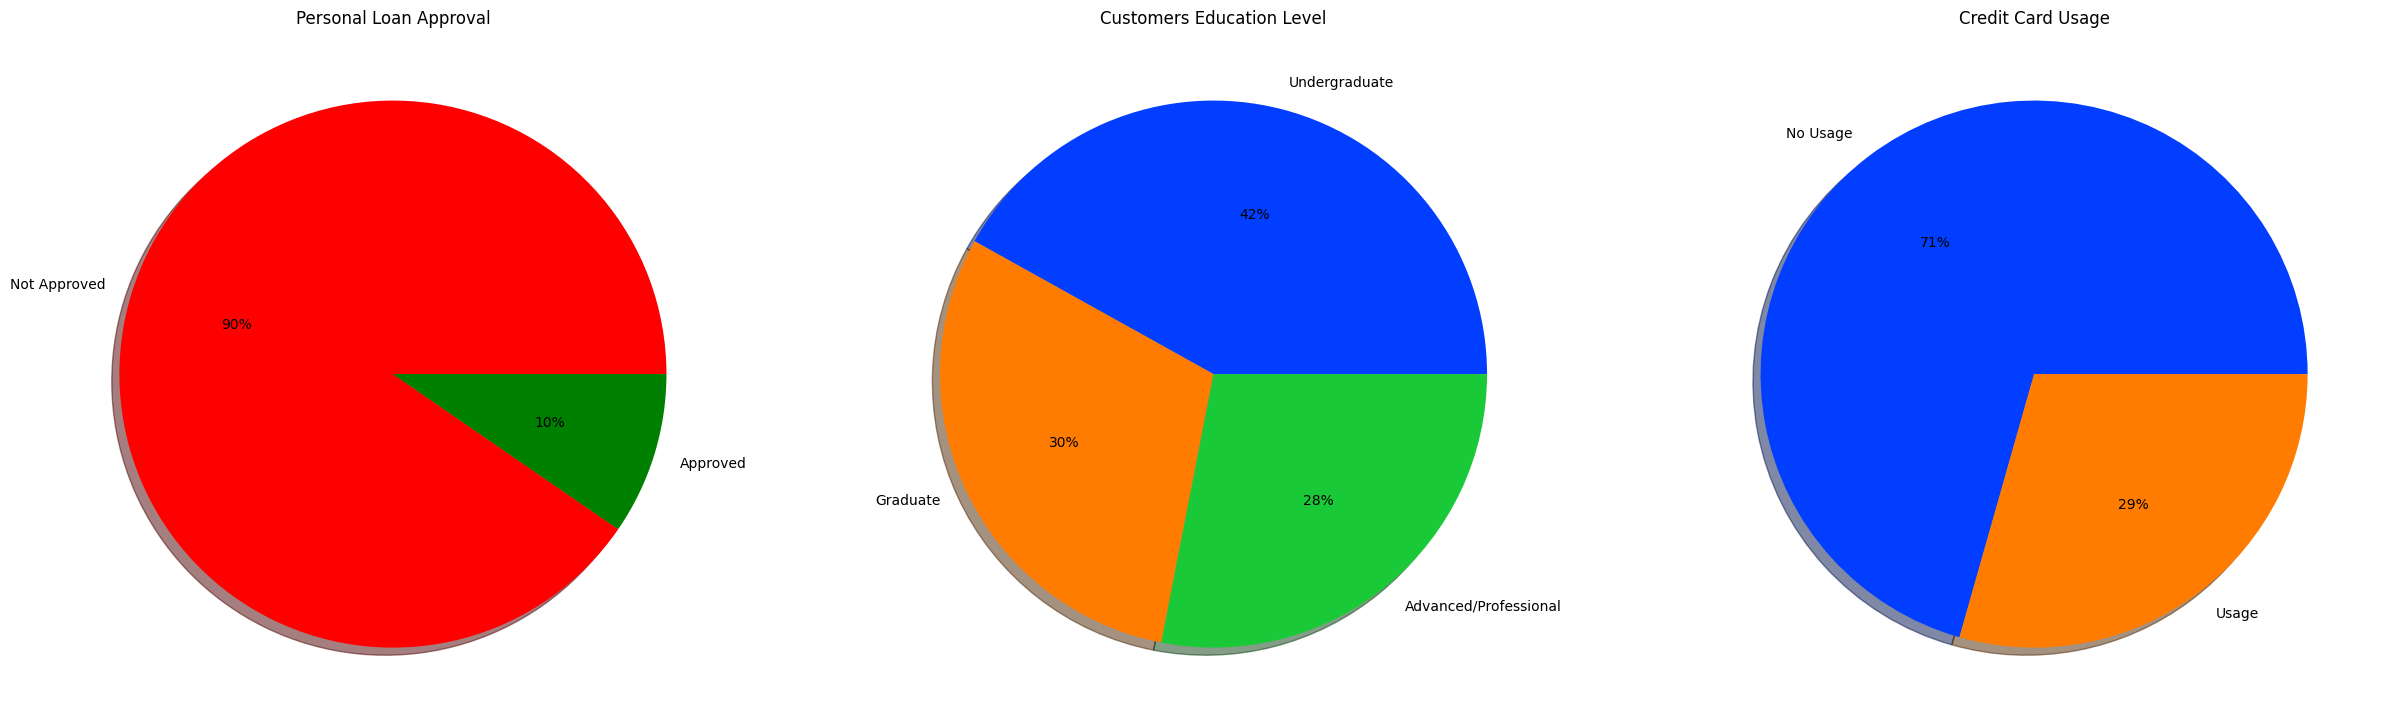

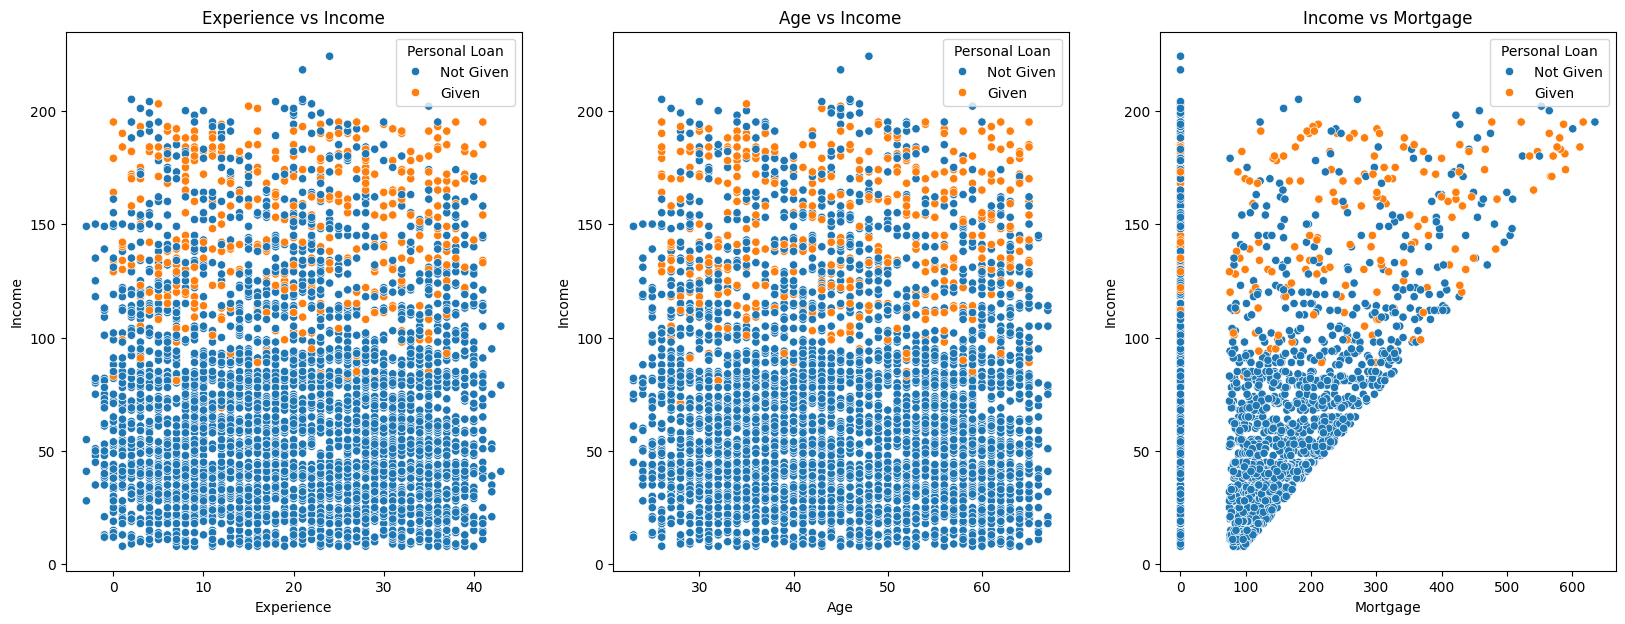

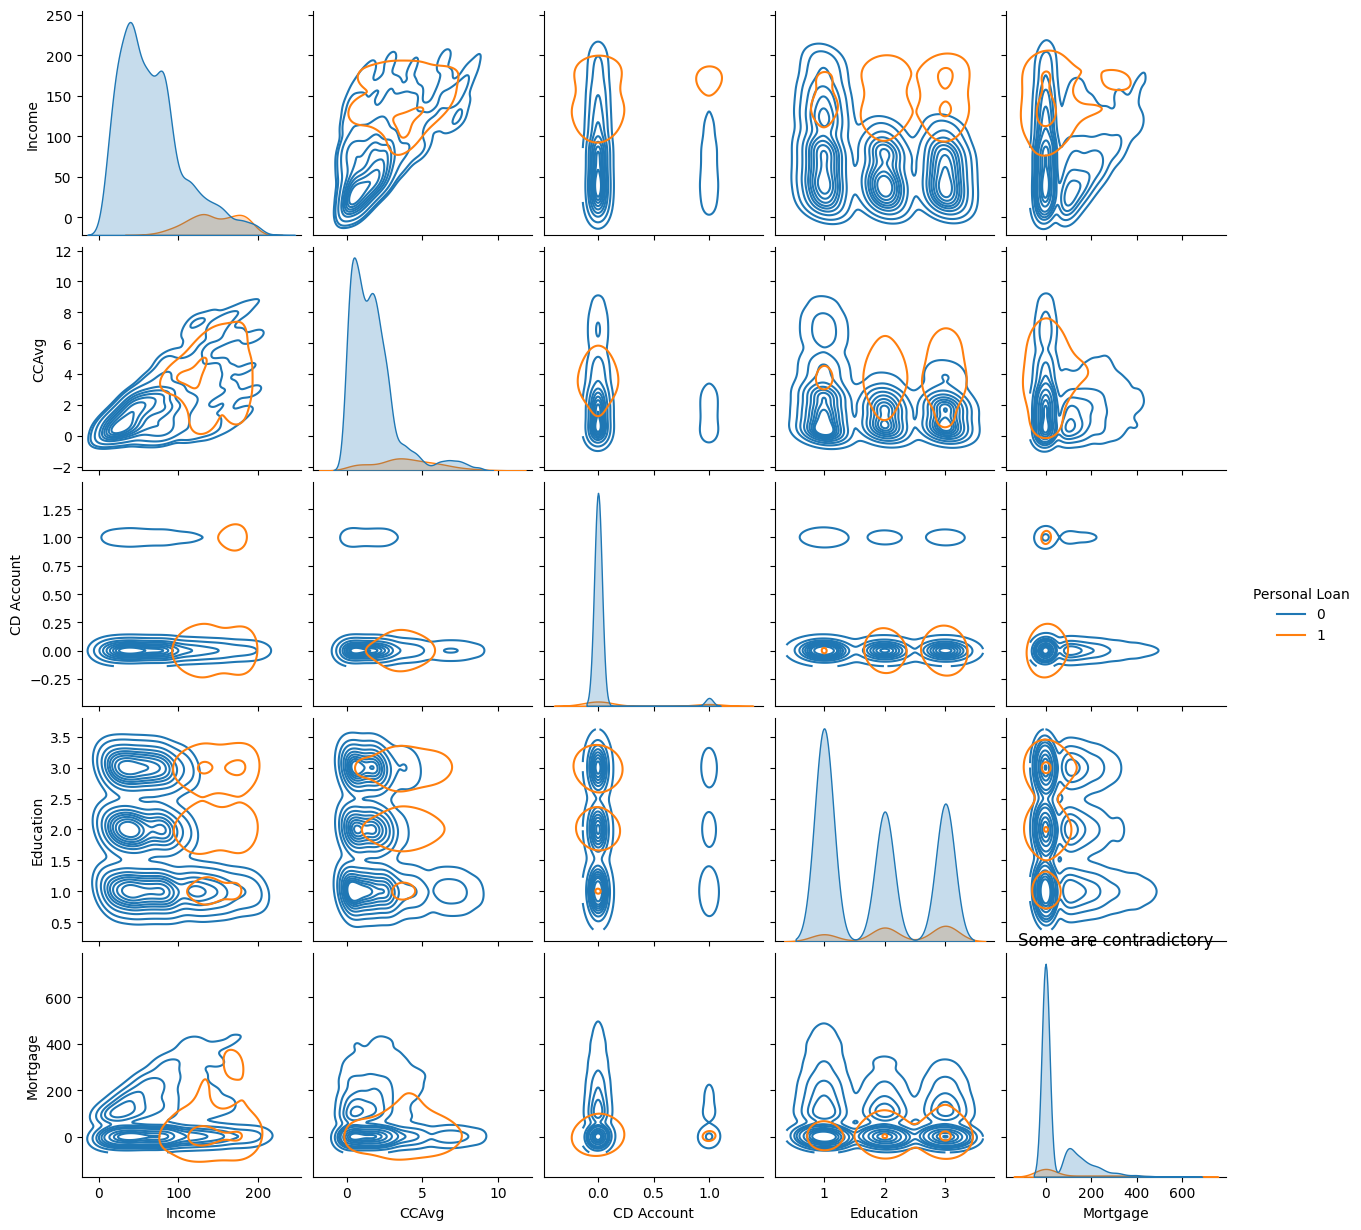

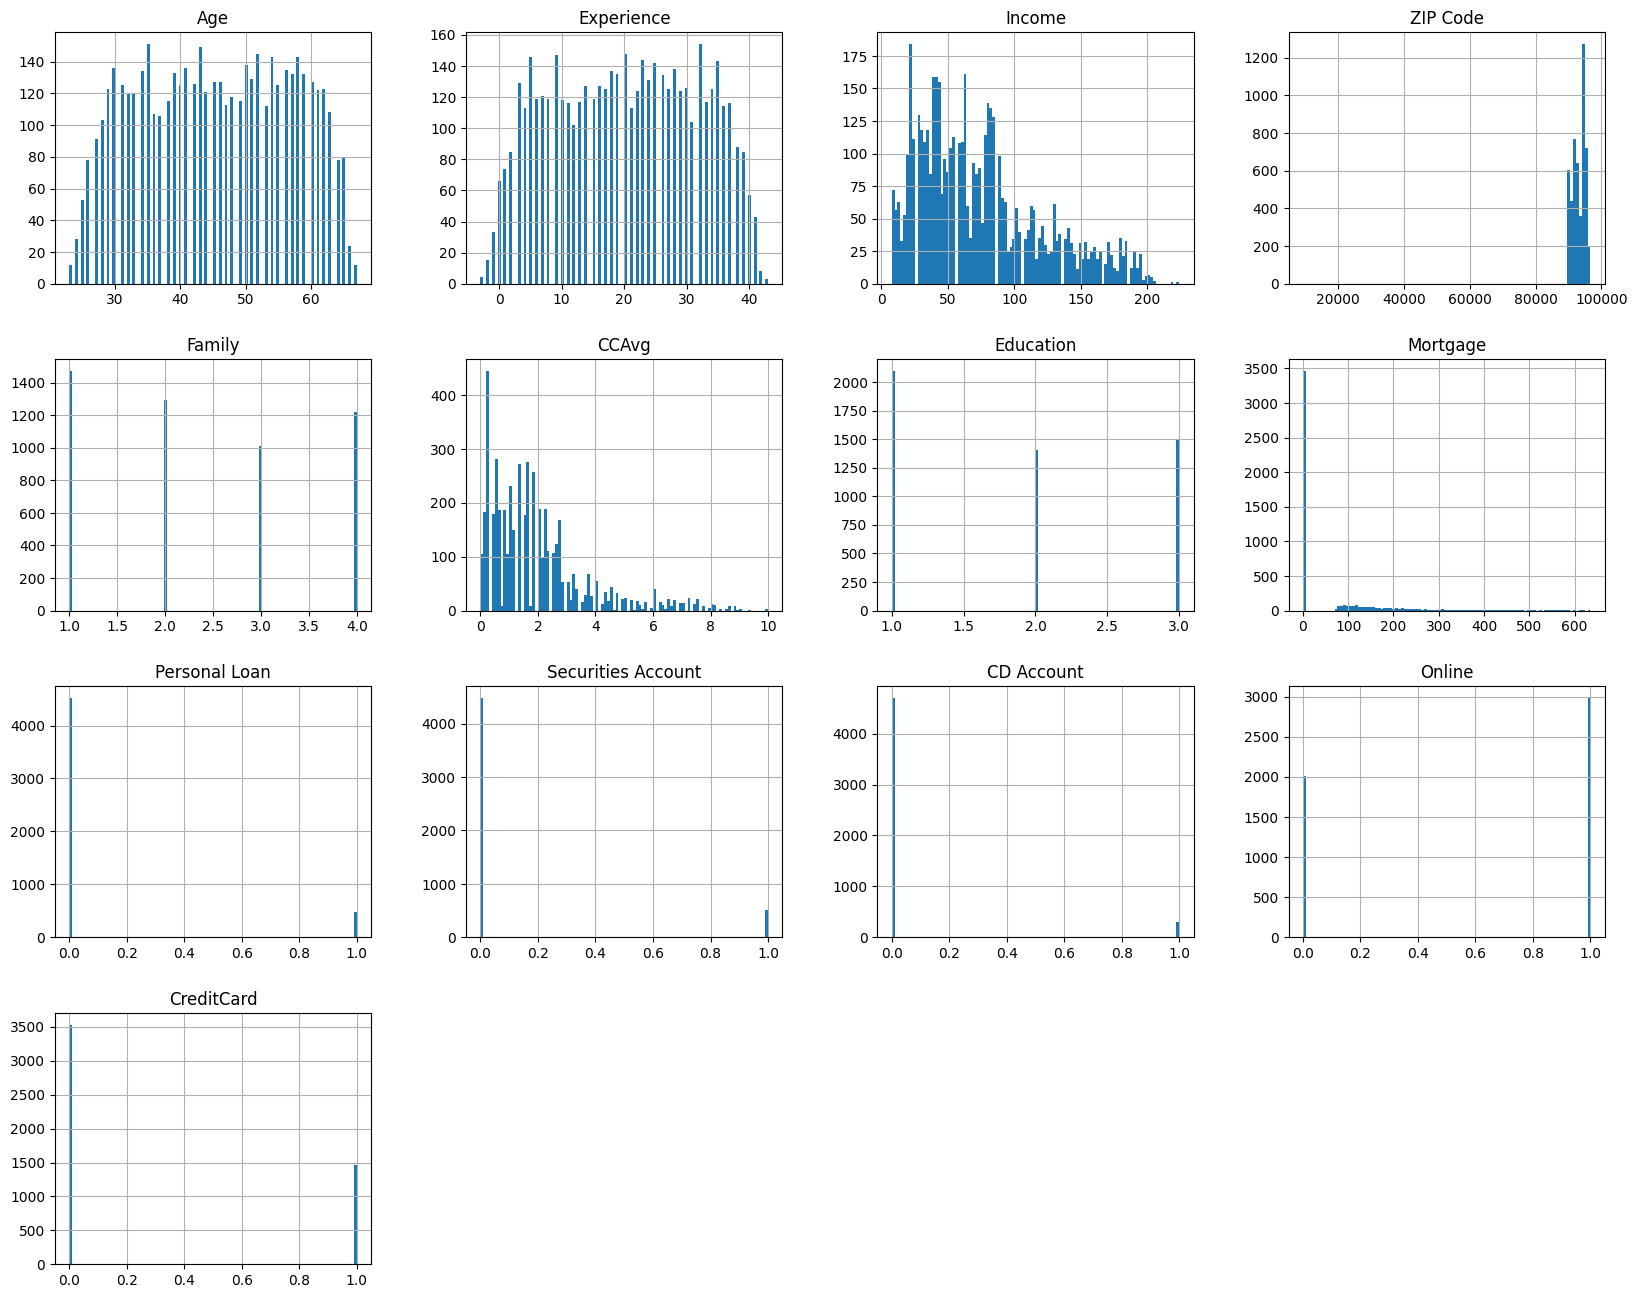

In [4]:
clean_dataset(df)
summarize_data(df)
transformed_personal_loan = transform_personal_loan(df)
plot_income_distribution(df, hue=transformed_personal_loan)
plot_credit_card_usage(df, hue=transformed_personal_loan)
show_correlation_heatmap(df)
plot_customer_insights(df)
plot_income_scatter(df, hue=transformed_personal_loan)
real_columns = ['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage', 'Personal Loan']
test_columns = ['Income', 'Personal Loan']
plot_pair_relationships(df, hue='Personal Loan', columns=real_columns)
visualize_histograms(df)

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import classification_report, accuracy_score, classification_report, mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [6]:
class ModelPerformance:
    def __init__(self, model):
        self.model = model
        self.model_name = str(model)
        self.accuracy_score = None
        self.cross_validation_scores = None
        self.mean_cross_validation_score = None
        self.mean_squared_error = None
        self.confusion_matrix = None

    def display_metrics(self):
        print(f"Model: {self.model_name}")
        print(f"Accuracy Score: {int(self.accuracy_score * 100)}%")
        print(f"Cross-Validation Score: {int(self.mean_cross_validation_score * 100)}%")
        print(f"Mean Squared Error: {self.mean_squared_error}")
        matrix = self.confusion_matrix
        print(f"Confusion Matrix:\n{matrix[0][0]} {matrix[0][1]} \n{matrix[1][0]}  {matrix[1][1]}\n\n")

class MachineLearningModel:
    def __init__(self, models, x=None, y=None, test_size=0.2):
        self.models = models
        self.fitted_models = []
        self.performances = []
        self.X = x
        self.Y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)

    def train_models(self):
        for model in self.models:
            model.fit(self.X_train, self.y_train)
            self.fitted_models.append(model)

        return self.fitted_models

    def evaluate_models(self):
        for model in self.fitted_models:
            y_predict = model.predict(self.X_test)

            performance = ModelPerformance(model)
            performance.accuracy_score = accuracy_score(self.y_test, y_predict)
            performance.cross_validation_scores = cross_val_score(model, self.X, self.Y, cv=10)
            performance.mean_cross_validation_score = np.mean(performance.cross_validation_scores)
            performance.mean_squared_error = mean_squared_error(self.y_test, y_predict)
            performance.confusion_matrix = confusion_matrix(self.y_test, y_predict)

            self.performances.append(performance)
        return self.performances

    def display_model_metrics(self):
        for performance in self.performances:
            performance.display_metrics()

    def get_performance(self, model_name):
        for performance in self.performances:
            if performance.model_name == model_name:
                return performance
        return None

    def get_top_models(self, n):
        sorted_models = sorted(self.performances, key=lambda x: x.accuracy_score, reverse=True)
        return sorted_models[:n]


In [7]:
regresssions_and_classifiers = [
    LogisticRegression(max_iter=3000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier()
]

x_df_data = df[['Income', 'CCAvg', 'CD Account', 'Education', 'Mortgage']]
y_df_data = df['Personal Loan']

ml_model = MachineLearningModel(regresssions_and_classifiers, x_df_data, y_df_data)
ml_model.train_models()
ml_model.evaluate_models()
ml_model.display_model_metrics()


Model: LogisticRegression(max_iter=3000)
Accuracy Score: 94%
Cross-Validation Score: 94%
Mean Squared Error: 0.054
Confusion Matrix:
878 13 
41  68


Model: DecisionTreeClassifier()
Accuracy Score: 95%
Cross-Validation Score: 95%
Mean Squared Error: 0.043
Confusion Matrix:
870 21 
22  87


Model: RandomForestClassifier()
Accuracy Score: 96%
Cross-Validation Score: 97%
Mean Squared Error: 0.032
Confusion Matrix:
881 10 
22  87


Model: GradientBoostingClassifier()
Accuracy Score: 96%
Cross-Validation Score: 97%
Mean Squared Error: 0.035
Confusion Matrix:
880 11 
24  85


Model: GaussianNB()
Accuracy Score: 88%
Cross-Validation Score: 88%
Mean Squared Error: 0.113
Confusion Matrix:
818 73 
40  69


Model: SVC()
Accuracy Score: 89%
Cross-Validation Score: 90%
Mean Squared Error: 0.102
Confusion Matrix:
888 3 
99  10


Model: KNeighborsClassifier()
Accuracy Score: 92%
Cross-Validation Score: 92%
Mean Squared Error: 0.078
Confusion Matrix:
874 17 
61  48




In [8]:
import joblib

for performance in ml_model.get_top_models(2):
    model = performance.model
    filename = str(performance.model_name).split('(')[0].strip('Classifier').strip('egression') + '.joblib'

    with open(filename, 'w+b') as file:
        joblib.dump(model, filename)
        print(model, "saved as", filename)

RandomForestClassifier() saved as andomForest.joblib
GradientBoostingClassifier() saved as GradientBoost.joblib


In [9]:
import glob

loaded_models = []

for model_path in glob.glob('./*.joblib'):
    with open(model_path, 'r+b') as file:
        loaded_models.append(joblib.load(file))

for model in loaded_models:
    print(model)


RandomForestClassifier()
GradientBoostingClassifier()
